In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#RA-RUNS ALLOWED
#RS-RUNS SCORED
#OBP-ON BASE PERCENTAGE--SHOULD BE HIGHER
#SLG-SLUGGING PERCENTAGE--SHOULD BE HIGHER
#BA-BATTING AVERAGE
#OOBP-OPPONENTS OBP
#OSLG-OPPONENTS SLG
#W-NO OF WINS IN THAT SEASON

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
#loading data
df=pd.read_csv('baseball.csv')
df.head(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [3]:
#adddind 'RD' column
df['RD']=df['RS']-df['RA']
df.head(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


In [6]:
df.shape

(1232, 16)

In [7]:
#filtering out data before'2002' till 2002
df1=df[df['Year']<2002]
df1.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


In [8]:
df1.shape

(902, 16)

Year                AxesSubplot(0.125,0.71587;0.168478x0.16413)
RS               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
RA               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
W                AxesSubplot(0.731522,0.71587;0.168478x0.16413)
OBP                AxesSubplot(0.125,0.518913;0.168478x0.16413)
SLG             AxesSubplot(0.327174,0.518913;0.168478x0.16413)
BA              AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Playoffs        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
RankSeason         AxesSubplot(0.125,0.321957;0.168478x0.16413)
RankPlayoffs    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
G               AxesSubplot(0.529348,0.321957;0.168478x0.16413)
OOBP            AxesSubplot(0.731522,0.321957;0.168478x0.16413)
OSLG                  AxesSubplot(0.125,0.125;0.168478x0.16413)
RD                 AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

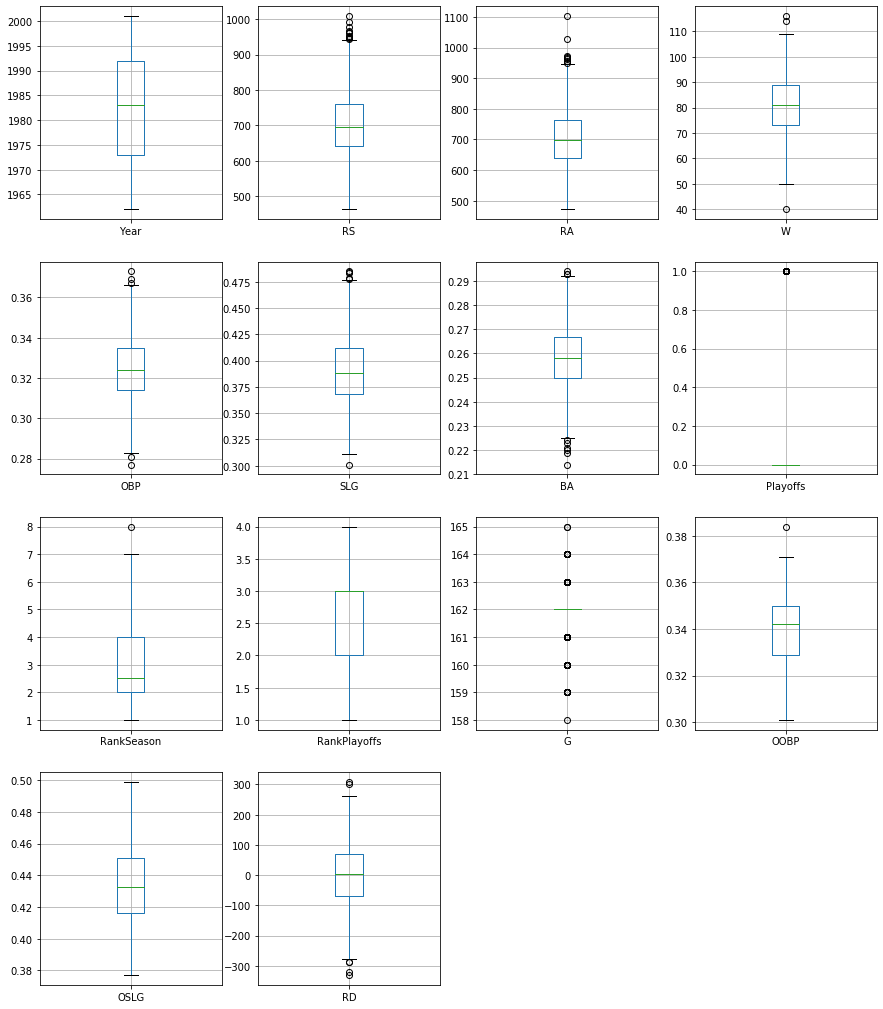

In [9]:
df1.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False,grid=True,figsize=(15,18))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A92BF4358>,
      dtype=object)

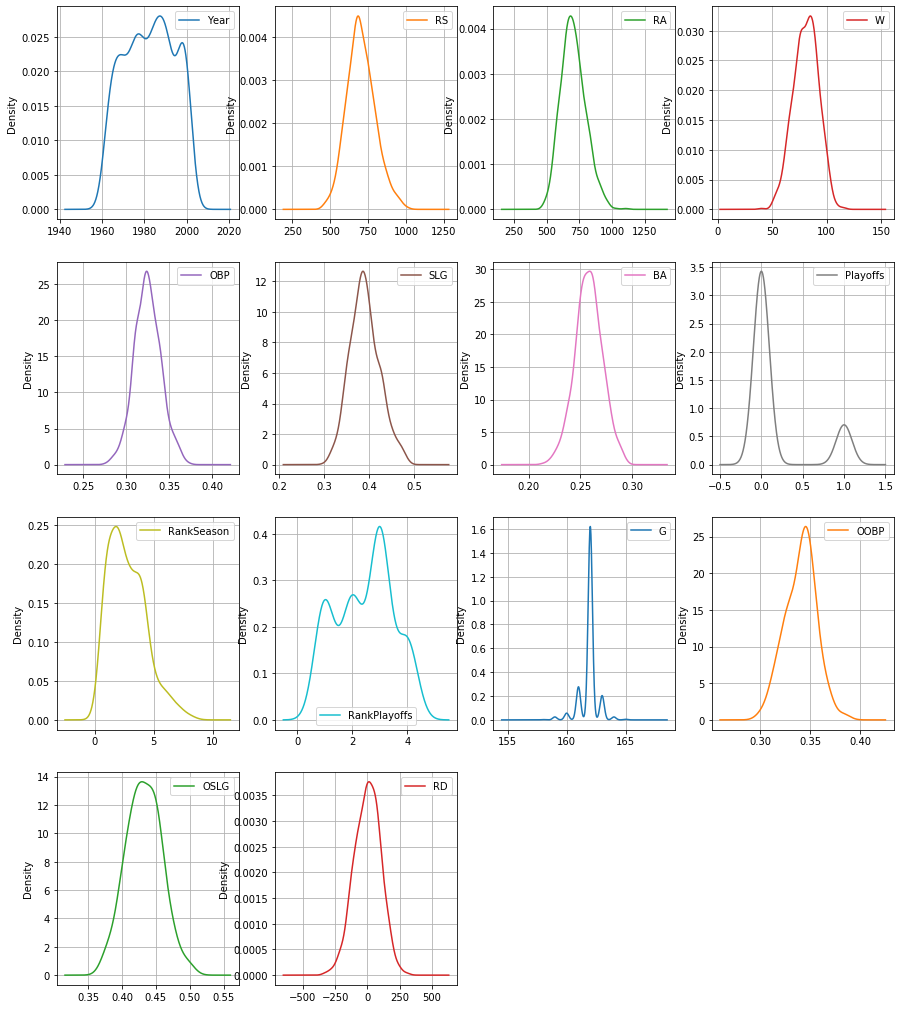

In [10]:
df1.plot(kind='kde',subplots=True,layout=(4,4),sharex=False,sharey=False,grid=True,figsize=(15,18))

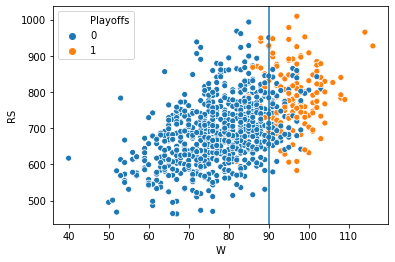

In [11]:
sns.scatterplot(df1.W,df1.RS,hue=df.Playoffs)
plt.axvline(90)

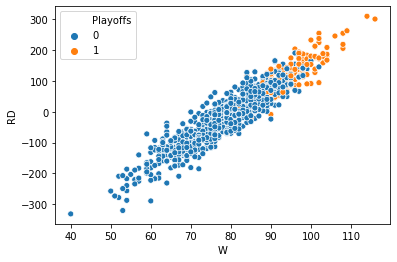

In [12]:
sns.scatterplot(df1.W,df1.RD,hue=df.Playoffs)

In [13]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


In [14]:
#checking for null value
df1.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      748
RankPlayoffs    748
G                 0
OOBP            812
OSLG            812
RD                0
dtype: int64

In [15]:
# dfsamp=df1.copy(deep=True)

In [16]:
# dfsamp.fillna(df.dropna().median())

In [17]:
# #imputing all missing values with median
# from sklearn.preprocessing import Imputer
# fv=Imputer(missing_values=np.nan,strategy='median',axis=0)
# for i in df1.columns:
#     df1[i]=fv.fit_transform(df1[[i]])

In [18]:
cols=['RankPlayoffs','RankSeason']
for i in cols:
    df1[i]=df[i].fillna(df[i].median())

In [19]:
cols=['OOBP','OSLG']
for i in cols:
    df1[i]=df1[i].fillna(df1[i].dropna().sample().iloc[0])

In [20]:
#checking for null value
df1.isnull().sum()

Team            0
League          0
Year            0
RS              0
RA              0
W               0
OBP             0
SLG             0
BA              0
Playoffs        0
RankSeason      0
RankPlayoffs    0
G               0
OOBP            0
OSLG            0
RD              0
dtype: int64

In [21]:
df1.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,1982.356984,703.809313,703.809313,80.881375,0.324961,0.390412,0.258153,0.170732,2.964523,2.906874,161.906874,0.352651,0.449154,0.000000
std,11.556504,93.314579,93.784100,11.403424,0.015391,0.033110,0.013266,0.376483,0.646741,0.466619,0.702127,0.006318,0.009788,101.188684
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.301000,0.377000,-331.000000
25%,1973.000000,641.250000,640.000000,73.000000,0.314000,0.368000,0.250000,0.000000,3.000000,3.000000,162.000000,0.354000,0.451000,-70.750000
50%,1983.000000,695.000000,697.000000,81.000000,0.324000,0.388000,0.258000,0.000000,3.000000,3.000000,162.000000,0.354000,0.451000,3.000000
75%,1992.000000,761.750000,763.000000,89.000000,0.335000,0.411750,0.267000,0.000000,3.000000,3.000000,162.000000,0.354000,0.451000,69.750000
max,2001.000000,1009.000000,1103.000000,116.000000,0.373000,0.485000,0.294000,1.000000,8.000000,4.000000,165.000000,0.384000,0.499000,309.000000


In [22]:
df1.corr()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
Year,1.000000e+00,0.485502,0.483072,0.002756,0.474799,0.517828,0.438729,0.113014,0.157024,0.108670,-0.027085,-0.332125,-0.290486,-4.316055e-19
RS,4.855023e-01,1.000000,0.415014,0.507382,0.904909,0.926384,0.831625,0.371631,0.005791,-0.054115,0.056206,-0.223043,-0.204935,5.375395e-01
RA,4.830717e-01,0.415014,1.000000,-0.507772,0.367105,0.459514,0.350411,-0.241213,0.226918,0.232975,-0.037402,-0.046104,-0.006841,-5.441052e-01
W,2.755645e-03,0.507382,-0.507772,1.000000,0.474080,0.405972,0.416391,0.588978,-0.224802,-0.302854,0.108128,-0.158473,-0.173650,9.385150e-01
OBP,4.747989e-01,0.904909,0.367105,0.474080,1.000000,0.806154,0.854055,0.345530,0.015025,-0.046402,-0.003827,-0.203809,-0.191986,4.942505e-01
SLG,5.178276e-01,0.926384,0.459514,0.405972,0.806154,1.000000,0.814068,0.300191,0.047073,-0.013747,0.012873,-0.252636,-0.223717,4.284077e-01
BA,4.387291e-01,0.831625,0.350411,0.416391,0.854055,0.814068,1.000000,0.278772,0.020555,-0.050769,-0.001805,-0.120659,-0.095146,4.421417e-01
Playoffs,1.130136e-01,0.371631,-0.241213,0.588978,0.345530,0.300191,0.278772,1.000000,-0.120961,-0.440090,0.009831,-0.195606,-0.204122,5.662745e-01
RankSeason,1.570245e-01,0.005791,0.226918,-0.224802,0.015025,0.047073,0.020555,-0.120961,1.000000,0.367849,0.022046,-0.076643,-0.061026,-2.049724e-01
RankPlayoffs,1.086700e-01,-0.054115,0.232975,-0.302854,-0.046402,-0.013747,-0.050769,-0.440090,0.367849,1.000000,0.000601,-0.034008,-0.026258,-2.658309e-01


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [24]:
#W = B0 + B1*RD
x=df1[['RD']]
y=df1.W
LR = LinearRegression()
LR.fit(x,y)
r2=LR.score(x,y)
print("R2 : ",r2)
print("coef: ",LR.coef_)
print("intercept: ",LR.intercept_)

R2 :  0.8808103719972755
coef:  [0.10576562]
intercept:  80.88137472283813


In [25]:
# RS = B0 +B1*OBP + B2*SLG
x=df1[['OBP','SLG']]
y=df1.RS
LR = LinearRegression()
LR.fit(x,y)
r2=LR.score(x,y)
print("R2 : ",r2)
print("coef: ",LR.coef_)
print("intercept: ",LR.intercept_)

R2 :  0.9295810608096597
coef:  [2737.76802227 1584.90860546]
intercept:  -804.62706106224


In [26]:
# RA = B0 +B1*OOBP + B2*OSLG
x=df1[['OOBP','OSLG']]
y=df1.RA
LR = LinearRegression()
LR.fit(x,y)
r2=LR.score(x,y)
print("R2 : ",r2)
print("coef: ",LR.coef_)
print("intercept: ",LR.intercept_)

R2 :  0.006546229716148599
coef:  [-2401.51458526  1278.44712526]
intercept:  976.485524337802


In [27]:
LR.predict([[0.307,0.373]])

array([716.08132439])

In [28]:
LR.predict([[0.339,0.430]])

array([712.1043438])

In [29]:
# LR.predict([[788.44338686-585.04417539]])

actual value is 103

# knn imputation

In [30]:
# imputing OOBP

In [31]:
#data for processing
dftemp=df[df['Year']<2002]
dftemp.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


In [32]:
dftemp.shape

(902, 16)

In [33]:
#checking for null values
dftemp.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      748
RankPlayoffs    748
G                 0
OOBP            812
OSLG            812
RD                0
dtype: int64

In [34]:
#since 'RankSeason','RankPlayoffs','OSLG' has a lot of Nan values,droping them
dftemp1=dftemp.drop(columns=['RankSeason','RankPlayoffs','OSLG'])

In [8]:
#preparing data from prediction
dftemptrain=dftemp1[dftemp1['OOBP'].isnull()!=True]#training data where there are no null values
dftempfin=dftemp1[dftemp1['OOBP'].isnull()==True]#data for which 'OOBP' must be predicted ,(OOBP with ~Nan values)

In [9]:
dftemptrain.head()#viewing train data

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,162,0.331,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,162,0.311,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,162,0.314,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,162,0.337,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,161,0.329,27


In [10]:
dftemptrain.shape

(90, 13)

In [11]:
dftempfin.head()#viewing test data

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,RD
420,ANA,AL,1998,787,783,85,0.335,0.415,0.272,0,162,NaN,4
421,ARI,NL,1998,665,812,65,0.314,0.393,0.246,0,162,NaN,-147
422,ATL,NL,1998,826,581,106,0.342,0.453,0.272,1,162,NaN,245
423,BAL,AL,1998,817,785,79,0.347,0.447,0.273,0,162,NaN,32
424,BOS,AL,1998,876,729,92,0.348,0.463,0.280,1,162,NaN,147


In [12]:
dftempfin.shape

(812, 13)

In [13]:
#seting independent and dependent variables
x=dftemptrain.drop(columns=['OOBP','Team','League'])
y=dftemptrain.OOBP

Text(0, 0.5, 'r2')

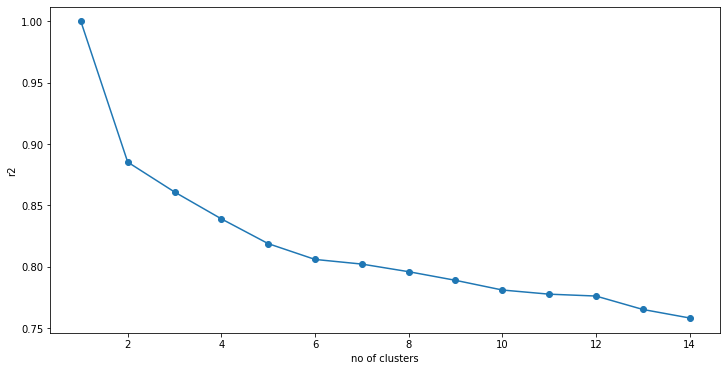

In [16]:
cluster_range=range(1,15)
cluster_inertia=[]
for num_clusters in cluster_range:
    model=KNeighborsRegressor(num_clusters)
    model.fit(x,y)
    cluster_inertia.append(model.score(x,y))
plt.figure(figsize=(12,6))
plt.plot(cluster_range,cluster_inertia,marker='o')
plt.xlabel("no of clusters")
plt.ylabel("r2")

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
#fitting the model with train data for prediction

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [19]:
#reseting index of test data for prediction
dftempfin.reset_index(drop=True,inplace=True)

In [ ]:
#Adding the predicted values to empty 'OOBP' column
dftempfin['OOBP']=pd.DataFrame(knn.predict(dftempfin.drop(columns=['OOBP','Team','League'])))

In [20]:
#reseting index of train data frame so as to merge appropriately
dftemptrain.set_index(np.arange(813,813+dftemptrain.shape[0]),inplace=True)

In [21]:
dftemptrain.shape[0]

90

In [22]:
dftempfin.shape[0]

812

In [23]:
#the final data after replacing all Nan in OOBP with predicted values of OOBP
newdf=pd.concat((dftempfin,dftemptrain),axis=0)
newdf.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,RD
0,ANA,AL,1998,787,783,85,0.335,0.415,0.272,0,162,NaN,4
1,ARI,NL,1998,665,812,65,0.314,0.393,0.246,0,162,NaN,-147
2,ATL,NL,1998,826,581,106,0.342,0.453,0.272,1,162,NaN,245
3,BAL,AL,1998,817,785,79,0.347,0.447,0.273,0,162,NaN,32
4,BOS,AL,1998,876,729,92,0.348,0.463,0.280,1,162,NaN,147


In [24]:
newdf.shape

(902, 13)

In [25]:
dftemp.shape

(902, 16)

In [26]:
newdf.sort_values(by=['Team'],inplace=True)

In [27]:
dftemp.sort_values(by=['Team'],inplace=True)

In [28]:
#updating the OOBP column with the predicted values
dftemp['OOBP']=newdf['OOBP'].iloc[0]

In [29]:
dftemp.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      748
RankPlayoffs    748
G                 0
OOBP            902
OSLG            812
RD                0
dtype: int64

#### imputing 'OSLG'

In [30]:
#since 'RankSeason','RankPlayoffs' has a lot of Nan values,droping them
dftemp1=dftemp.drop(columns=['RankSeason','RankPlayoffs'])
#preparing data from prediction
dftemptrain=dftemp1[dftemp1['OSLG'].isnull()!=True]#training data where there are no null values
dftempfin=dftemp1[dftemp1['OSLG'].isnull()==True]#data for which 'OSLG' must be predicted ,(OSLG with ~Nan values)
#seting independent and dependent variables
x=dftemptrain.drop(columns=['OSLG','Team','League'])
y=dftemptrain.OSLG
#fitting the model with train data for prediction
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x,y)
#reseting index of test data for prediction
dftempfin.reset_index(drop=True,inplace=True)
#Adding the predicted values to empty 'OSLG' column
dftempfin['OSLG']=pd.DataFrame(knn.predict(dftempfin.drop(columns=['OSLG','Team','League'])))
#reseting index of train data frame so as to merge appropriately
dftemptrain.set_index(np.arange(813,813+dftemptrain.shape[0]),inplace=True)
#the final data after replacing all Nan in OSLG with predicted values of OSLG
newdf=pd.concat((dftempfin,dftemptrain),axis=0)
newdf.sort_values(by=['Team'],inplace=True)
dftemp.sort_values(by=['Team'],inplace=True)
#updating the OSLG column with the predicted values
dftemp['OSLG']=newdf['OSLG'].iloc[0]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
dftemp.head()

#### imputing 'RankSeason'

In [ ]:
#since 'RankPlayoffs' has a lot of Nan values,droping them
dftemp1=dftemp.drop(columns=['RankPlayoffs'])
#preparing data from prediction
dftemptrain=dftemp1[dftemp1['RankSeason'].isnull()!=True]#training data where there are no null values
dftempfin=dftemp1[dftemp1['RankSeason'].isnull()==True]#data for which 'OSLG' must be predicted ,(OSLG with ~Nan values)
#seting independent and dependent variables
x=dftemptrain.drop(columns=['RankSeason','Team','League'])
y=dftemptrain.RankSeason
#fitting the model with train data for prediction
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(x,y)
#reseting index of test data for prediction
dftempfin.reset_index(drop=True,inplace=True)
#Adding the predicted values to empty 'RankSeason' column
dftempfin['RankSeason']=pd.DataFrame(knn.predict(dftempfin.drop(columns=['RankSeason','Team','League'])))
#reseting index of train data frame so as to merge appropriately
dftemptrain.set_index(np.arange(813,813+dftemptrain.shape[0]),inplace=True)
#the final data after replacing all Nan in RankSeason with predicted values of RankSeason
newdf=pd.concat((dftempfin,dftemptrain),axis=0)
newdf.sort_values(by=['Team'],inplace=True)
dftemp.sort_values(by=['Team'],inplace=True)
#updating the RankSeason column with the predicted values
dftemp['RankSeason']=newdf['RankSeason'].iloc[0]

In [ ]:
dftemp.head()

#### imputing 'RankPlayoffs'

In [ ]:
dftemp1=dftemp
#preparing data from prediction
dftemptrain=dftemp1[dftemp1['RankPlayoffs'].isnull()!=True]#training data where there are no null values
dftempfin=dftemp1[dftemp1['RankPlayoffs'].isnull()==True]#data for which 'RankPlayoffs' must be predicted ,(RankPlayoffs with ~Nan values)
#seting independent and dependent variables
x=dftemptrain.drop(columns=['RankPlayoffs','Team','League'])
y=dftemptrain.RankPlayoffs
#fitting the model with train data for prediction
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(x,y)
#reseting index of test data for prediction
dftempfin.reset_index(drop=True,inplace=True)
#Adding the predicted values to empty 'RankSeason' column
dftempfin['RankPlayoffs']=pd.DataFrame(knn.predict(dftempfin.drop(columns=['RankPlayoffs','Team','League'])))
#reseting index of train data frame so as to merge appropriately
dftemptrain.set_index(np.arange(813,813+dftemptrain.shape[0]),inplace=True)
#the final data after replacing all Nan in RankPlayoffs with predicted values of RankPlayoffs
newdf=pd.concat((dftempfin,dftemptrain),axis=0)
newdf.sort_values(by=['Team'],inplace=True)
dftemp.sort_values(by=['Team'],inplace=True)
#updating the RankPlayoffs column with the predicted values
dftemp['RankPlayoffs']=newdf['RankPlayoffs'].iloc[0]

In [ ]:
dftemp.head()

In [ ]:
dftemp.shape

In [ ]:
# RS = B0 +B1*OBP + B2*SLG
x=dftemp[['OBP','SLG']]
y=dftemp.RS
LR1 = LinearRegression()
LR1.fit(x,y)
r2=LR1.score(x,y)
print("R2 : ",r2)
print("coef: ",LR1.coef_)
print("intercept: ",LR1.intercept_)

In [ ]:
LR1.predict([[0.339,0.430]])

In [ ]:
# RA = B0 +B1*OOBP + B2*OSLG
x=dftemp[['OOBP','OSLG']]
y=dftemp.RA
LR0 = LinearRegression()
LR0.fit(x,y)
r2=LR0.score(x,y)
print("R2 : ",r2)
print("coef: ",LR0.coef_)
print("intercept: ",LR0.intercept_)

In [ ]:
LR0.predict([[0.307,0.373]])

In [ ]:
#W = B0 + B1*RD
x=dftemp[['RD']]
y=dftemp.W
LR2 = LinearRegression()
LR2.fit(x,y)
r2=LR2.score(x,y)
print("R2 : ",r2)
print("coef: ",LR2.coef_)
print("intercept: ",LR2.intercept_)

In [ ]:
LR2.predict([[(805.60575215-678.05700507)]])